In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.plotting.register_matplotlib_converters()
%matplotlib inline
print("Setup Complete")



/kaggle/input/healthy-lifestyle-cities-report-2021/healthy_lifestyle_city_2021.csv
Setup Complete


# **Introduction**
This is an anlyisis of the healthy-lifestyle-city-2021.csv dataset on Kaggle. Looking into the data source I found that the rankings of each city were made from 10 wieghted metrics giving each city a score out of 100. I will forgo the Rank in my analysis and focus on the measured obvservations to find relationships in the data.

### **First I will load and preview the data**

In [2]:
print('Preview of the data: ')
hlc_data = pd.read_csv('../input/healthy-lifestyle-cities-report-2021/healthy_lifestyle_city_2021.csv')
hlc_data.head(5)

Preview of the data: 


,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [3]:
print('City and Rank + The 10 metrics: ')
hlc_data.columns

City and Rank + The 10 metrics: 


Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [4]:
print('Description of the data: ')
hlc_data.describe()

Description of the data: 


,Rank,Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City)
count,44.000000,44.00000,44.000000,44.000000,44.000000
mean,22.500000,78.17500,6.435000,213.977273,1443.113636
std,12.845233,5.30437,0.991202,127.190297,1388.803270
min,1.000000,56.30000,3.570000,23.000000,250.000000
25%,11.750000,75.40000,5.870000,125.250000,548.000000
50%,22.500000,80.40000,6.900000,189.500000,998.000000
75%,33.250000,81.80000,7.175000,288.250000,1674.250000
max,44.000000,83.20000,7.800000,585.000000,6417.000000


#### Many columns had incompatible datatypes and missing data, so i will create new dataframes with compatible datatypes and cleaned data so that i can easily manipulate the data.

after cleaning the desired data i will check the correlation coefficients to find areas in the data to investigate firther.

In [5]:
cleaned_hlc_data = hlc_data.copy()
#obe_hlc_data = hlc_data
cleaned_hlc_data['Obesity levels(Country)'] = cleaned_hlc_data['Obesity levels(Country)'].str.replace('%', '', regex=False)
cleaned_hlc_data['Obesity levels(Country)'] = cleaned_hlc_data['Obesity levels(Country)'].astype(str).astype(float)
#print(obe_hlc_data['Obesity levels(Country)'])

#cost_hlc_data = hlc_data
cleaned_hlc_data['Cost of a bottle of water(City)'] = cleaned_hlc_data['Cost of a bottle of water(City)'].str.replace('£', '', regex=False)
cleaned_hlc_data['Cost of a bottle of water(City)'] = cleaned_hlc_data['Cost of a bottle of water(City)'].astype(str).astype(float)
#print(cost_hlc_data['Cost of a bottle of water(City)'])


#gymcost_hlc_data = hlc_data
cleaned_hlc_data['Cost of a monthly gym membership(City)'] = cleaned_hlc_data['Cost of a monthly gym membership(City)'].str.replace('£', '', regex=False)
cleaned_hlc_data['Cost of a monthly gym membership(City)'] = cleaned_hlc_data['Cost of a monthly gym membership(City)'].astype(str).astype(float)
#print(gymcost_hlc_data['Cost of a monthly gym membership(City)'])
#print(cleaned_hlc_data)

cleaned_hlc_data.corr()


,Rank,Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
Rank,1.000000,-0.141420,0.197486,-0.320034,-0.231970,-0.076972,0.363058,0.272521
Cost of a bottle of water(City),-0.141420,1.000000,0.293047,0.612382,0.813159,-0.260297,-0.089963,0.356461
Obesity levels(Country),0.197486,0.293047,1.000000,0.091071,0.446399,0.150171,0.016833,-0.070904
Life expectancy(years) (Country),-0.320034,0.612382,0.091071,1.000000,0.724587,-0.044864,0.128163,0.417986
Happiness levels(Country),-0.231970,0.813159,0.446399,0.724587,1.000000,-0.137612,0.033116,0.297425
Outdoor activities(City),-0.076972,-0.260297,0.150171,-0.044864,-0.137612,1.000000,0.528200,-0.115400
Number of take out places(City),0.363058,-0.089963,0.016833,0.128163,0.033116,0.528200,1.000000,0.092610
Cost of a monthly gym membership(City),0.272521,0.356461,-0.070904,0.417986,0.297425,-0.115400,0.092610,1.000000


Some of the data had missing values so i will check the correlation coefficient for those data individually, as i will have to drop rows without values.

In [6]:
hours_hlc_data = cleaned_hlc_data.copy()
hours_hlc_data = hours_hlc_data[hours_hlc_data['Annual avg. hours worked'] != '-']
hours_hlc_data['Annual avg. hours worked'] = hours_hlc_data['Annual avg. hours worked'].astype(str).astype(int)
hours_hlc_data.corr()

,Rank,Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
Rank,1.000000,-0.156477,0.290423,-0.431469,0.498113,-0.308642,-0.037535,0.407923,0.406191
Cost of a bottle of water(City),-0.156477,1.000000,-0.004787,0.447720,-0.636100,0.766225,-0.366549,-0.275817,0.241377
Obesity levels(Country),0.290423,-0.004787,1.000000,-0.407865,0.265088,0.253585,0.138793,-0.100645,-0.117215
Life expectancy(years) (Country),-0.431469,0.447720,-0.407865,1.000000,-0.480859,0.407255,-0.167352,-0.043328,0.290493
Annual avg. hours worked,0.498113,-0.636100,0.265088,-0.480859,1.000000,-0.531554,0.083404,-0.035817,0.144633
Happiness levels(Country),-0.308642,0.766225,0.253585,0.407255,-0.531554,1.000000,-0.292265,-0.305360,0.082452
Outdoor activities(City),-0.037535,-0.366549,0.138793,-0.167352,0.083404,-0.292265,1.000000,0.588237,-0.197376
Number of take out places(City),0.407923,-0.275817,-0.100645,-0.043328,-0.035817,-0.305360,0.588237,1.000000,0.098211
Cost of a monthly gym membership(City),0.406191,0.241377,-0.117215,0.290493,0.144633,0.082452,-0.197376,0.098211,1.000000


In [7]:
sun_hlc_data = cleaned_hlc_data.copy()
sun_hlc_data = sun_hlc_data[sun_hlc_data['Sunshine hours(City)'] != '-']
sun_hlc_data['Sunshine hours(City)'] = sun_hlc_data['Sunshine hours(City)'].astype(str).astype(int)
sun_hlc_data.corr()

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
Rank,1.000000,0.007940,-0.139029,0.196606,-0.318965,-0.230374,-0.085025,0.362126,0.295783
Sunshine hours(City),0.007940,1.000000,-0.348465,0.281304,-0.356351,-0.334141,0.129550,-0.211848,0.030697
Cost of a bottle of water(City),-0.139029,-0.348465,1.000000,0.320489,0.607240,0.810776,-0.211022,-0.058752,0.289369
Obesity levels(Country),0.196606,0.281304,0.320489,1.000000,0.096661,0.460237,0.145836,0.012849,-0.062760
Life expectancy(years) (Country),-0.318965,-0.356351,0.607240,0.096661,1.000000,0.719049,-0.018894,0.144531,0.401021
Happiness levels(Country),-0.230374,-0.334141,0.810776,0.460237,0.719049,1.000000,-0.105374,0.053702,0.260345
Outdoor activities(City),-0.085025,0.129550,-0.211022,0.145836,-0.018894,-0.105374,1.000000,0.519624,-0.056549
Number of take out places(City),0.362126,-0.211848,-0.058752,0.012849,0.144531,0.053702,0.519624,1.000000,0.133460
Cost of a monthly gym membership(City),0.295783,0.030697,0.289369,-0.062760,0.401021,0.260345,-0.056549,0.133460,1.000000


In [8]:
pol_hlc_data = cleaned_hlc_data.copy()
pol_hlc_data = pol_hlc_data[pol_hlc_data['Pollution(Index score) (City)'] != '-']
pol_hlc_data['Pollution(Index score) (City)'] = pol_hlc_data['Pollution(Index score) (City)'].astype(str).astype(float)
pol_hlc_data.corr()

,Rank,Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
Rank,1.000000,-0.160508,0.156132,-0.301275,0.427297,-0.253738,-0.122384,0.352271,0.311411
Cost of a bottle of water(City),-0.160508,1.000000,0.281698,0.633767,-0.735286,0.811766,-0.286457,-0.099299,0.375971
Obesity levels(Country),0.156132,0.281698,1.000000,0.136392,-0.256251,0.440548,0.098091,-0.010373,-0.030005
Life expectancy(years) (Country),-0.301275,0.633767,0.136392,1.000000,-0.558713,0.748339,-0.013609,0.145122,0.404191
Pollution(Index score) (City),0.427297,-0.735286,-0.256251,-0.558713,1.000000,-0.765902,0.242622,0.187227,-0.244865
Happiness levels(Country),-0.253738,0.811766,0.440548,0.748339,-0.765902,1.000000,-0.161151,0.024503,0.316620
Outdoor activities(City),-0.122384,-0.286457,0.098091,-0.013609,0.242622,-0.161151,1.000000,0.521406,-0.083967
Number of take out places(City),0.352271,-0.099299,-0.010373,0.145122,0.187227,0.024503,0.521406,1.000000,0.110514
Cost of a monthly gym membership(City),0.311411,0.375971,-0.030005,0.404191,-0.244865,0.316620,-0.083967,0.110514,1.000000


# **Analysis**
### **Now I will begin to analyze the data looking for trends, relationships and/or destributions among the data**
The data is not based over a period of time so, therefor finding a pattern of change (trends) will not be possible. Relationships seem to be what the data will show best so i will begin with analyzing relationships with the aforementioned correlation coefficients. I will start with graphing the less surprising data.

<AxesSubplot:title={'center':'Happiness and Life Expactancy Viz'}, xlabel='Happiness', ylabel='Life Expectancy'>

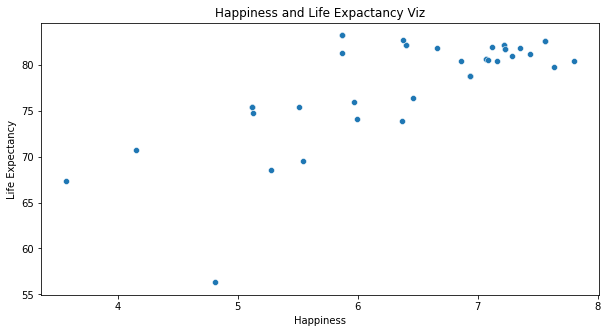

In [9]:
plt.figure(figsize = (10,5))
plt.xlabel('Happiness')
plt.ylabel('Life Expectancy')
plt.title('Happiness and Life Expactancy Viz')
sns.scatterplot(data=cleaned_hlc_data, x = 'Happiness levels(Country)', y = 'Life expectancy(years) (Country)')

#### It is no surprise that there is a strong correlation between Happiness and Life expectancy.
  The correlation can be better seen using a scatter plot graph with an added line of best fit.

<AxesSubplot:title={'center':'Happiness and Life Expactancy Viz'}, xlabel='Happiness levels(Country)', ylabel='Life expectancy(years) (Country)'>

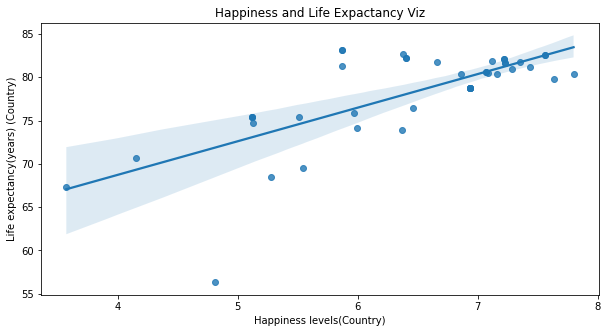

In [10]:
plt.figure(figsize = (10,5))
plt.xlabel('Happiness')
plt.ylabel('Life Expectancy')
plt.title('Happiness and Life Expactancy Viz')
sns.regplot(data=cleaned_hlc_data, x = 'Happiness levels(Country)', y = 'Life expectancy(years) (Country)')

#### Here we can see a clear positive correlation with the line of best fit and very few outliers.
Lets now dig deeper into the data to see if we can find surprising correlations 

<AxesSubplot:title={'center':'Happiness and Hours Worked Viz'}, xlabel='Happiness', ylabel='Annual avg. hours worked'>

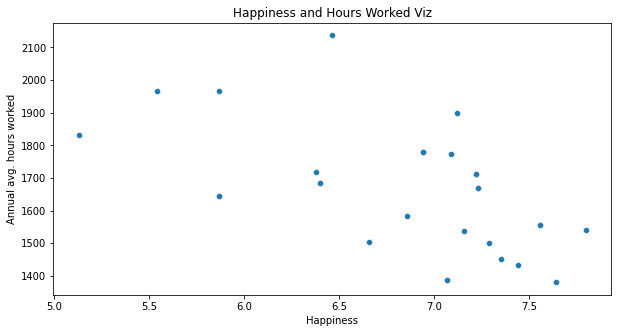

In [11]:

plt.figure(figsize = (10,5))
plt.xlabel('Happiness')
plt.ylabel('Annual avg. hours worked')
plt.title('Happiness and Hours Worked Viz')
sns.scatterplot(data=hours_hlc_data, x = 'Happiness levels(Country)', y = 'Annual avg. hours worked')

There may be a negative correlation between annual hours worked and happiness. That is, less hours worked, the happier people tend to be. Lets check using a scatter plot with a line of best fit.

<AxesSubplot:title={'center':'Happiness and Hours Worked Viz'}, xlabel='Happiness levels(Country)', ylabel='Annual avg. hours worked'>

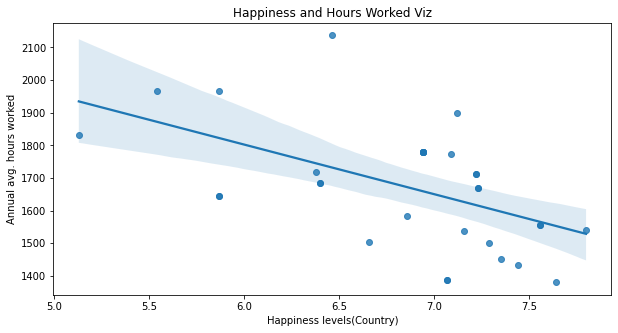

In [12]:
plt.figure(figsize = (10,5))
plt.xlabel('Happiness')
plt.ylabel('Annual avg. hours worked')
plt.title('Happiness and Hours Worked Viz')
sns.regplot(data=hours_hlc_data, x = 'Happiness levels(Country)', y = 'Annual avg. hours worked')

Yes there is a negative correlation between annual hours worked and happiness, however the correlation is not as strong as we might have ecpected.

<AxesSubplot:title={'center':'Happiness and Pollution Viz'}, xlabel='Happiness levels(Country)', ylabel='Pollution(Index score) (City)'>

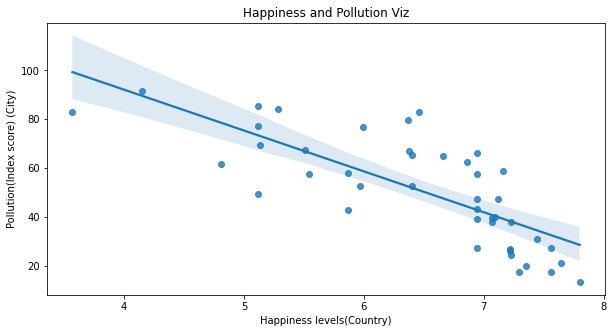

In [13]:
plt.figure(figsize = (10,5))
plt.xlabel('Happiness')
plt.ylabel('Pollution(Index Score)')
plt.title('Happiness and Pollution Viz')
sns.regplot(data=pol_hlc_data, x = 'Happiness levels(Country)', y = 'Pollution(Index score) (City)')

Less pollution also has a negative correlation with happiness scores and the correlation is much stronger than that of hours worked. possibly pollution would have an impact on health and that in turn could have an impact on happiness.

<AxesSubplot:title={'center':'Life Expactancy and Pollution Viz'}, xlabel='Life expectancy(years) (Country)', ylabel='Pollution(Index score) (City)'>

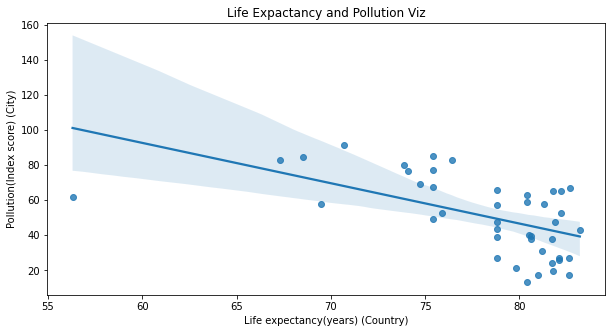

In [14]:
plt.figure(figsize = (10,5))
plt.xlabel('Life expactancy')
plt.ylabel('Pollution(Index Score)')
plt.title('Life Expactancy and Pollution Viz')
sns.regplot(data=pol_hlc_data, x = 'Life expectancy(years) (Country)', y = 'Pollution(Index score) (City)')

Our correlation isn't quite as strong as we would expect; However there is a negative correlation between pollution and life expectancy. The lower the pollution, the longer the average life expectancy. I think we would find stronger correlations with life expactancy if it was per city as opposed to country, as some countries can be quite large with some cities being much more or less polluted than others.

#### **Surprising results**
After looking at the more obvious correlations, let's now look at the more surprising correlations and see if we can figure out why there is correlation where we might otherwise not expect there to be.

<AxesSubplot:title={'center':'Happiness and Sunshine Viz'}, xlabel='Happiness levels(Country)', ylabel='Sunshine hours(City)'>

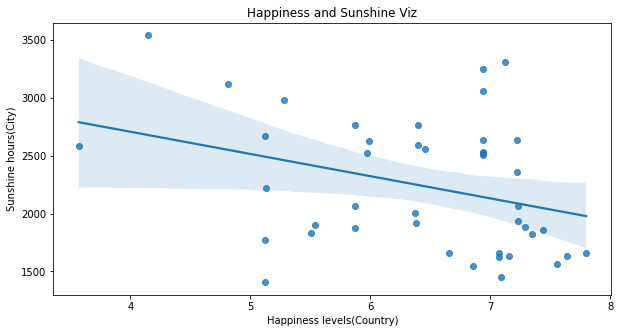

In [15]:
plt.figure(figsize = (10,5))
plt.xlabel('Happiness')
plt.ylabel('Sunshine')
plt.title('Happiness and Sunshine Viz')
sns.regplot(data=sun_hlc_data, x = 'Happiness levels(Country)', y = 'Sunshine hours(City)')

Surprisingly There is only a small negative correlation between happiness and sunshine hours, which means that sunshine doesnt seem to play as big of a role on happiness as we might expect.

<AxesSubplot:title={'center':'Happiness and Cost of a bottle of water Viz'}, xlabel='Happiness levels(Country)', ylabel='Cost of a bottle of water(City)'>

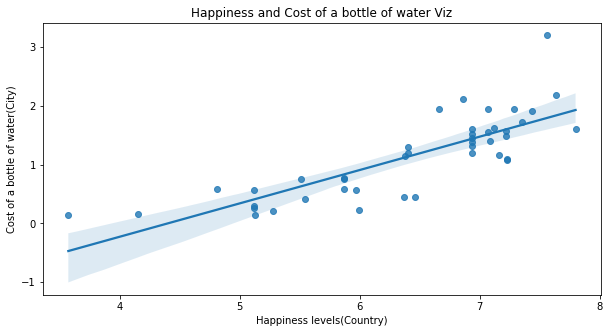

In [16]:
plt.figure(figsize = (10,5))
plt.xlabel('Happiness')
plt.ylabel('Cost of a bottle of water')
plt.title('Happiness and Cost of a bottle of water Viz')
sns.regplot(data=sun_hlc_data, x = 'Happiness levels(Country)', y = 'Cost of a bottle of water(City)')

This is a very surprising positive correlation. The higher the cost of a bottle of water strongly correlates with higher happiness levels. You may expect that a negative correlation would mean lower water costs that would be indicitive of lower living costs which would make a population happier. So why is a higher cost of water positively correlated to happiness? Unless this is a spurious correlation I think this has to do with the wealth of a country/city. Higher costs for items may indicate that the population can afford to pay that much for an essential item which would mean that the population is wealthier and therefore has higher living standards/conditions which would no doubt contribute to happiness.  

# **Conclusion**
After reviewing the data set healthy-lifestyle-city-2021.csv I have come to some conlusions and criticisms regarding the data set:

### Criticisms/Limitations
1. The dataset required cleaning and the data was not easily manipulated because of missing data and differing datatypes.

2. After cleaning the data I noticed some discrepancies between what was actually measured. The data claims to rank the healthiest cities in the world based on data from cities and also countries, which the latter could skew the results of data analysis. For example the life expactancy was taken from the country as a whole while there could be cities within a country that have much higher or lower life expectancies than the entire country.

3. Each city in the data was given a ranking from 1 to 44 declaring the healthiest places in the world; However, the data source claims to weigh their observations to determine this rank in an unknown way, which is why i ommitted Rank from any analysis.

4. The data only covers 44 cities, with such a small sample it may be difficult to generalize findings from the analysis to all cities around the world.

### Review
1. There were some not so surprising findings like the correlation between life expectancy and happiness, but there were some correlations and non-correlations which were quite surprising.

2. The lack of correlation between sun light and happiness was interesting because the lack of sun light can cause depression in some individuals and sun is generally associated with happiness.

3. The positive correlation between the cost of water and happiness was the most interesting and also the strongest correlation with happiness out of all of the metrics. The reason for this correlation may be due to higher costs of living which is associated with higher income and thus higher living standards/conditions and a wealthier city.